In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gss
from scipy.signal import decimate
from single_shot_filtering import one_shot_msmt, plot_stats, low_pass_filter, set_fft_zero

import matplotlib.pyplot as plt
from matplotlib.pylab import colorbar
import matplotlib; import matplotlib.ticker as mtick
matplotlib.rc('axes',edgecolor='gray')

In [2]:
gs = gridspec.GridSpec(nrows=2, ncols=1, top=0.99, bottom=0.1, left=0.2, right=0.99, wspace=0.4, hspace=0.5)
fig = plt.figure(figsize=(2.0,3.0))

Consider the total phase accumulated on a qubit due to its interacting with slowly varying noise: for a single value of detuning and a single wait time in a Ramsey experiment:

In [3]:
detuning_0 = 2.
tau_0 = 10**-5

In [4]:
tau_fixed = tau_0*200
print tau_fixed

0.002


Slice B

In [5]:
def truncate_phases(phase_):
    for idx_phase in xrange(phase_.shape[0]):
        if phase_[idx_phase] > np.pi:
            break
    return idx_phase

In [6]:
k_chirp=0.00
offset = 0.8*np.pi
phase = tau_fixed*2.0*np.pi*detuning_0*(np.arange(0,200, 1) + k_chirp*np.arange(0,200, 1)**2) + offset
idx_max = truncate_phases(phase-offset)
P_sliceB = 0.5*np.cos(phase[:idx_max]) + 0.5
single_shot_msmts_B = np.random.binomial(n=1, p=P_sliceB)

tau_N_axis = tau_fixed*np.arange(idx_max)
print idx_max

126


In [7]:
tau_N_axis[-1]

0.25

Roughly implement low pass filters:

In [8]:
_theory = P_sliceB
_msmts = single_shot_msmts_B
_freq = tau_fixed
_time_step = tau_fixed
_time_axis = tau_N_axis / tau_fixed
dec_factor = 4
decimate_order = 8
fsize=8
labels = ['Single Shot', 'Decimated']


signal_d = decimate(_msmts, dec_factor, decimate_order)
data = [_msmts, signal_d]

ax_3 = fig.add_subplot(gs[0, 0])
ax_4 = fig.add_subplot(gs[1, 0])

axes = [ax_3, ax_4]

for idx_data in xrange(len(axes)):
    
    ax = axes[idx_data]
    ax.set_ylim([-0.1,1.1])
    #ax.set_xlim([0.,400])
    ax.tick_params(labelsize=fsize, direction='in')
    
    
    ax.plot(_time_axis, _theory, 'r--', lw=1, label='Applied')
    print idx_data
    
    if idx_data < 1:
        ax.plot(_time_axis, data[idx_data], 'o', label=labels[idx_data], c='black', alpha=0.2, markersize=3)
    
    if idx_data ==1:
        _time_axis = dec_factor*_time_axis[0:data[idx_data].shape[0]]
        ax.plot(_time_axis, data[idx_data], 'o', label=labels[idx_data], c='darkblue', alpha=0.8, markersize=3)
    
    #ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    ax.margins(0.1)


0
1


/home/riddhisw/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:3073: FutureWarning:  Note: Decimate's zero_phase keyword argument will default to True in a future release. Until then, decimate defaults to one-way filtering for backwards compatibility. Ideally, always set this argument explicitly.
  "explicitly.", FutureWarning)


In [9]:
pwd

u'/home/riddhisw/Documents/2017/Scripts_Git/v0'

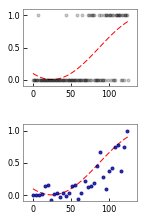

In [10]:
plt.savefig('FIGS_v0/slow_drift_v0_poster_v2_sliceB.svg', type='svg')
plt.show()
plt.close()